<a href="https://colab.research.google.com/github/codybaraks/Independent_Project_wk3/blob/master/Independent_Project_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Defining the Question**

Stating the question(Hypothesis) which is "Is the number of Bluecars taken in area X different than in area Y?




H0 = n of bluecars are more during the weekend 
H1 = n of bluecars are



## **Specifying the Data Analytic Question**

This section seeks to bring the aspect of identifying the

Hypothesis.Defining the NULL Hypothesis and Alternative Hypothsis.

Wether The Number of cars is greater in area X than in area Z? X and Y(Considering postal codes 75015 vs 75017)

In [67]:
# imports
import numpy as np
import pandas as pd
import pandas_profiling

# Importing Matplotlib
%matplotlib inline
!pip install matplotlib

import pylab

# Import seaborn
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# standazing
from sklearn.preprocessing import StandardScaler

from scipy import stats
from scipy.stats import norm

In [2]:
# Loading and Reading the dataset
# encoding='utf-8'
data = pd.read_csv("autolib_daily_events_postal_code.csv")
data.head(4)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21


In [0]:
import matplotlib.pyplot as plt
data.groupby('dayOfWeek')["BlueCars_returned_sum"].sum().plot.bar()
plt.show()

In [0]:
data.shape

(16085, 13)

### **Getting a synopsis of the dataset**

In [0]:
# Checking the top of the dataset
data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
# Checking the bottom of the dataset
data.tail()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [0]:
# Checking information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [8]:
# Describing the data
data.describe(include="all")

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,5/8/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


In [0]:
# Checking the data types to see whether, string, int,objects
data.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [0]:
# Using pandas Profiling
# Pobabily come up with insight such as duplicates and mising values
# profile = df.profile_report(data)
# profile
pandas_profiling.ProfileReport(data)

Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


In [0]:
# Find the unique values in the dataset under "day type" column
data["day_type"].unique()


array(['weekday', 'weekend'], dtype=object)

In [0]:
# Checking for Null values in the dataset
data.isna().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [0]:
# Checking to see if there are Duplicates in the dataset
data.duplicated().sum()

0

### **Checking for Consistency and uniformity in the dataset**

In [0]:
# Checking to see consistency in the dataFrame

for column in data.columns:
  print("\n")
  print(data[column].unique())
  print(data[column].nunique())



[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]
104


['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/2018' '1/27/2018' '1/28/2018' '1/29/2018' '1/30/2018'
 '

### Checking For outliers in the DataFrame



In [0]:
# Since where showed a high correlation between the sum of blue cars taken and blue cars returned
# I will find the corelation of the two

Q1 = data["BlueCars_taken_sum"].quantile(0.25)
Q3 = data["BlueCars_taken_sum"].quantile(0.75)

IQR = Q3 - Q1 

outliers = ((data.BlueCars_taken_sum < Q1 - 1.5 * IQR) | (data.BlueCars_taken_sum > Q3 + 1.5 * IQR))
outliers.value_counts()

False    13870
True      2215
Name: BlueCars_taken_sum, dtype: int64

Noted that the number of Outliers are 2215 - FOR BlueCars_taken_sum

In [0]:
# Finding the Interquatile Range for BlueCars_returned_sum

Q1 = data["BlueCars_returned_sum"].quantile(0.25)
Q3 = data["BlueCars_returned_sum"].quantile(0.75)

IQR = Q3 - Q1 

outliers = ((data.BlueCars_returned_sum < Q1 - 1.5 * IQR) | (data.BlueCars_returned_sum > Q3 + 1.5 * IQR))
outliers.value_counts()

False    13872
True      2213
Name: BlueCars_returned_sum, dtype: int64

Noted that the number of Outliers are 2213 -  For BlueCars_returned_sum

In [0]:
!pip install matplotlib

In [0]:
data["BlueCars_taken_sum"] = data["BlueCars_taken_sum"].fillna(data["BlueCars_taken_sum"]).mean()

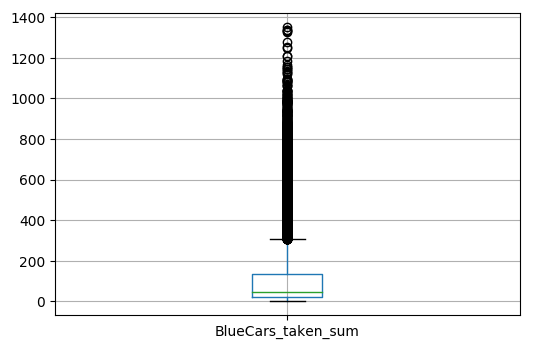

In [9]:
# Still checking for Outliers
# boxplot = data.boxplot(["BlueCars_taken_sum","BlueCars_returned_sum"])

# plt.show()
# x = data["BlueCars_taken_sum"]
# y = data["BlueCars_returned_sum"]

# sns.boxplot(x, y ) 
plt.figure(dpi=100)
data.boxplot('BlueCars_taken_sum')

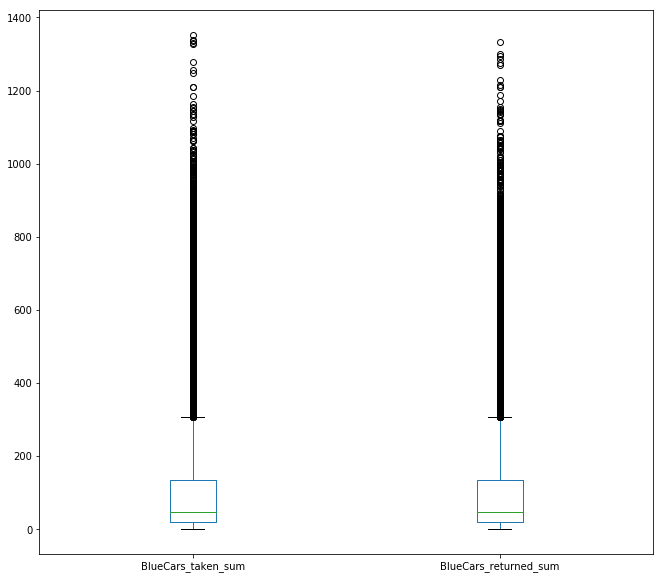

In [12]:
# Checking for outliers for Blue cars taken and Blue cars returned
data[["BlueCars_taken_sum","BlueCars_returned_sum"]].plot(kind="box",figsize=(11,10))


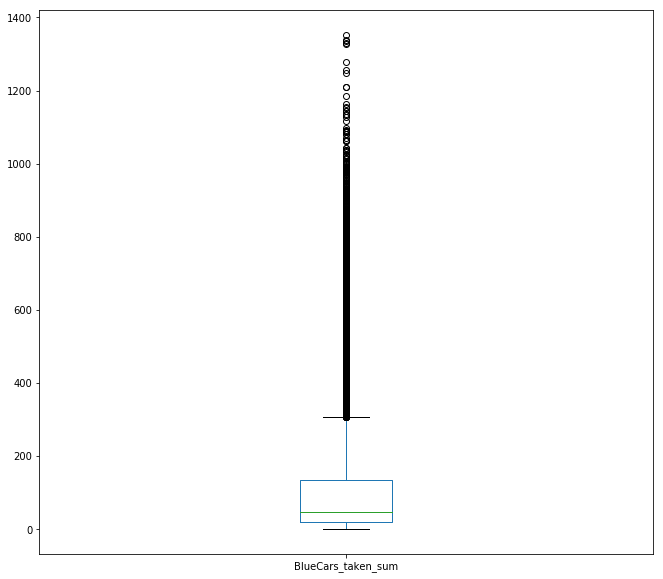

In [10]:
# Checking outliers of Blue cars taken

data[["BlueCars_taken_sum"]].plot(kind="box",figsize=(11,10))
# import pylab

# fina[['age_of_respondent']].plot(kind='box',figsize=(11,10))


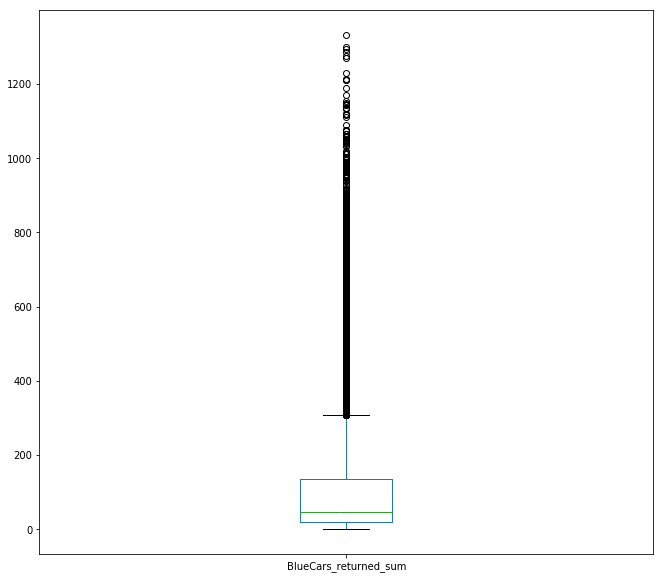

In [11]:
data[["BlueCars_returned_sum"]].plot(kind="box",figsize=(11,10))


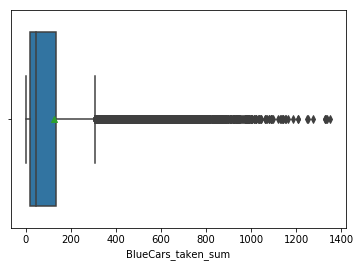

In [38]:
sns.boxplot(data["BlueCars_taken_sum"], showmeans=True)

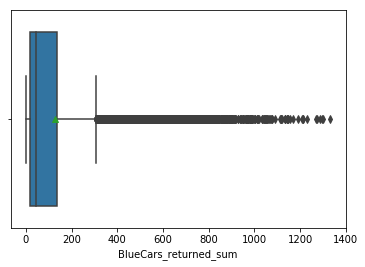

In [39]:
# Identifying outliers
sns.boxplot(data["BlueCars_returned_sum"], showmeans=True)

In [0]:
# Checking the columsn in the dataset

data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [0]:
# This is the section am meant to check for the outliers

## **Exploratory Data Analysis**

## **Univariate Analysis**
This section of Univariate Analysis Comprises of a number of things such as identifing and Finding

Measures of Central Tendency
-> mean

-> median

->Mode

Measures of Dispersion/Variability/Spread

-> standard deviation

-> Variance
-> Range 

-> Quatiles 

-> Skewedness

-> Kurtosis


Comming up with Graphs Charts and Visualization for the Dataframe

In [0]:
# This section of Univariate Analysis Comprises of a number of things such
# as identifing and Finding Items listed ubove

# Finding the mean


print(data["BlueCars_taken_sum"].mean())
print(data["BlueCars_returned_sum"].mean())


125.92695057506994
125.912713708424


In [0]:
# Finding the median
# Numerical_valuess = data[['day_type', 'Postal code', 'dayOfWeek']]

# for columns in Numerical_valuess: 
#   print(data[columns].median())
print(data["BlueCars_taken_sum"].median())
print(data["BlueCars_returned_sum"].median())

46.0
46.0


In [0]:
# Finding the Mode
Numerical_values = data[['date', 'day_type', 'Postal code', 'dayOfWeek']]

for column in Numerical_values: 
  print(data[column].mode())
  

0     1/24/2018
1     1/25/2018
2     1/27/2018
3     1/28/2018
4     1/29/2018
5      2/1/2018
6     2/23/2018
7     2/28/2018
8      2/3/2018
9      2/4/2018
10     2/5/2018
11    4/25/2018
12    4/26/2018
13    4/27/2018
14    4/28/2018
15    4/29/2018
16    4/30/2018
17     5/1/2018
18     5/2/2018
19    5/20/2018
20    5/22/2018
21    5/23/2018
22    5/24/2018
23    5/25/2018
24    5/26/2018
25    5/27/2018
26    5/28/2018
27    5/29/2018
28     5/3/2018
29    5/30/2018
30    5/31/2018
31     5/4/2018
32     5/5/2018
33     5/6/2018
34     5/8/2018
35     6/1/2018
36    6/10/2018
37    6/11/2018
38    6/12/2018
39     6/2/2018
40     6/3/2018
41     6/4/2018
42     6/5/2018
43     6/6/2018
44     6/7/2018
45     6/8/2018
46     6/9/2018
dtype: object
0    weekday
dtype: object
0     75001
1     75002
2     75003
3     75004
4     75005
5     75006
6     75007
7     75008
8     75009
9     75010
10    75011
11    75012
12    75013
13    75014
14    75015
15    75016
16    75017
17 

# **Measures of Dispersion/Variability/Spread**

In [0]:
data.size

209105

In [48]:
# Creating a sample to work with for the DATAframe
# Assuming i used a sample of about 1000 since the data size was 209105

data_sample = data.sample(n=1000)
print(data_sample)


       Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
11958        93390   1/7/2018  ...                0                0
1184         75008   4/6/2018  ...              125              132
11639        93350  6/12/2018  ...                2                2
3130         75112  1/11/2018  ...                1                1
1098         75008   1/7/2018  ...              115              124
3050         75020  3/31/2018  ...              150              144
5976         92200  2/21/2018  ...                0                0
2039         75014  1/12/2018  ...              117              114
10259        93110  5/31/2018  ...                0                0
9217         92420  1/30/2018  ...                0                0
13364        94110  3/31/2018  ...                0                0
14599        94300  3/18/2018  ...                0                0
8894         92400  1/19/2018  ...                2                2
8843         92390   5/7/2018  ...

### **Mean and Standard Deviation**

In [0]:
# print(data["BlueCars_taken_sum"].mean())
# print(data["BlueCars_returned_sum"].mean())

print(data_sample["BlueCars_taken_sum"].mean())
print(data_sample["BlueCars_returned_sum"].mean())

123.896
124.11


In [0]:
# standard deviation of the sample
data_sample.std()

Postal code               7491.226150
n_daily_data_points         31.346856
dayOfWeek                    2.026732
BlueCars_taken_sum         186.518203
BlueCars_returned_sum      187.004584
Utilib_taken_sum             5.779600
Utilib_returned_sum          5.924135
Utilib_14_taken_sum         13.077246
Utilib_14_returned_sum      13.185134
Slots_freed_sum             51.846415
Slots_taken_sum             51.712593
dtype: float64

In [0]:
# variance odf the data sample
data_sample.var()

Postal code               5.611847e+07
n_daily_data_points       9.826254e+02
dayOfWeek                 4.107644e+00
BlueCars_taken_sum        3.478904e+04
BlueCars_returned_sum     3.497071e+04
Utilib_taken_sum          3.340378e+01
Utilib_returned_sum       3.509538e+01
Utilib_14_taken_sum       1.710144e+02
Utilib_14_returned_sum    1.738477e+02
Slots_freed_sum           2.688051e+03
Slots_taken_sum           2.674192e+03
dtype: float64

### **RANGE**

In [0]:
# screenshort then group them
# Finding the range of the columns that have the highest correlation 
# I.E - BlueCars_taken_sum and BlueCars_returned_sum  - From my data_sample

# Range for the BlueCars_returned_sum column

print(data_sample["BlueCars_taken_sum"].max() - data_sample["BlueCars_taken_sum"].min())

1089


In [0]:
# Range for the BlueCars_returned_sum column

print(data_sample["BlueCars_returned_sum"].max() - data_sample["BlueCars_returned_sum"].min())

1090


### **Finding the Quantiles**

In [0]:
# Finding Quantile for the BlueCars_returned_sum column and the Blue_taken_sum
Blue_return = data["BlueCars_returned_sum"].quantile([0.25,0.5,0.75])

Blue_taken = data["BlueCars_returned_sum"].quantile([0.25,0.5,0.75])

print(Blue_return,Blue_taken)



0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_returned_sum, dtype: float64 0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_returned_sum, dtype: float64


### **Skewness**

### Skewness is a measure of the asymmetry of the 

probability distribution of a real-valued random variable

about its mean***

In [0]:
# I decided to find the skewness of the columns with the highest correlation
# The are BlueCars_returned_sum and BlueCars_taken_sum

print(data["BlueCars_returned_sum"].skew())
print(data["BlueCars_taken_sum"].skew())



2.412084978838923
2.4063548974959086


## **kurtosis()**

### **This is a function returns an unbiased kurtosis over requested axis using Fisher’s definition of kurtosis**

In [0]:
# I decided to find the Kurtosis of the columns with the highest correlation
# The are BlueCars_returned_sum and BlueCars_taken_sum

print(data["BlueCars_returned_sum"].kurt())
print(data["BlueCars_taken_sum"].kurt())

6.1862880957582345
6.172692305510042


### **Describing the data and checking the correlation**

In [22]:
data["BlueCars_returned_sum"].corr(data["Slots_freed_sum"])

0.9482575524525811

In [0]:
 data["BlueCars_returned_sum"].corr(data["BlueCars_returned_sum"])

1.0

Blue cars returned has a correlation of 1.
This means there is a very strong correlation

In [0]:
data_desc = data[["BlueCars_returned_sum","BlueCars_taken_sum"]]

data_desc.describe()

,BlueCars_returned_sum,BlueCars_taken_sum
count,16085.000000,16085.000000
mean,125.912714,125.926951
std,185.501535,185.426579
min,0.000000,0.000000
25%,20.000000,20.000000
50%,46.000000,46.000000
75%,135.000000,135.000000
max,1332.000000,1352.000000


## **Distributions within the datast**

## **Box Plot**

In [0]:
data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [19]:
weekend = data[data.day_type =='weekday']
weekend.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


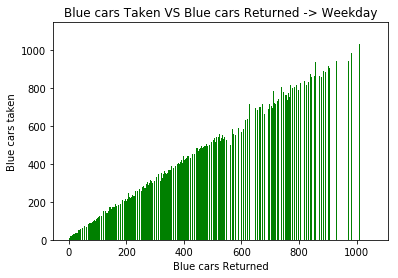

In [45]:

# Defining our data
returned = weekend["BlueCars_returned_sum"]
taken = weekend["BlueCars_taken_sum"]
 

plt.bar(returned, taken, color='green')

# Labelling our x axis
plt.xlabel("Blue cars Returned")

# Labelling our y axis
plt.ylabel("Blue cars taken")

# Giving a title to our Bar chart
plt.title("Blue cars Taken VS Blue cars Returned -> Weekday")

# Displaying our chart
plt.show()

In [36]:
days_of_the_week = weekend.groupby('dayOfWeek').BlueCars_taken_sum.sum()
days_of_the_week

dayOfWeek
0    263893
1    261940
2    261849
3    263207
4    288546
Name: BlueCars_taken_sum, dtype: int64

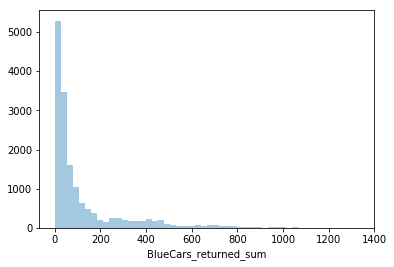

In [51]:
# Creating a bar Chart
# weekend.groupby('dayOfWeek')["BlueCars_returned_sum"].sum()

# days = weekend.groupby('dayOfWeek')["BlueCars_returned_sum"].sum()
# dataset = [1,2,3,4] 


# plt.bar(days,dataset)
# plt.ylabel("Days")
# plt.xlabel("Blue cars Taken")
# plt.title("Days showing the no' of Blue cars Taken")
# plt.show()


# plot = days.plot.pie(x = days,dataset, figsize=(5, 5))
sns.distplot(data['BlueCars_returned_sum'],  kde=False,label='Maize')


Am observation could be week days 0,1,2,3 and 4 have an average of 260000 apart from Friday

In [0]:
Creati

In [16]:
data.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [70]:
# Grouping the dataframe based on the Blue cars returned on weekdays
weekend.groupby('dayOfWeek')["BlueCars_returned_sum"].sum()

dayOfWeek
0    264808
1    260470
2    260673
3    262961
4    286029
Name: BlueCars_returned_sum, dtype: int64

In [0]:
data.groupby('dayOfWeek')["BlueCars_returned_sum"].sum().plot.bar()
plt.show()

In [0]:
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


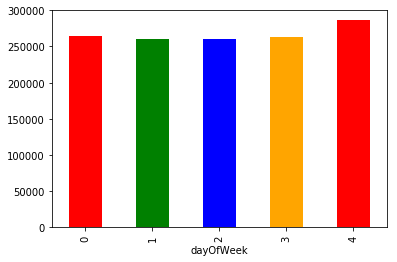

In [129]:
# Creating a Bar chart for Blue Cars returned based on weekday daytype
import matplotlib.pyplot as plt
colors = ["red","green","blue","orange"]
weekend.groupby('dayOfWeek')["BlueCars_returned_sum"].sum().plot.bar(colors=colors)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


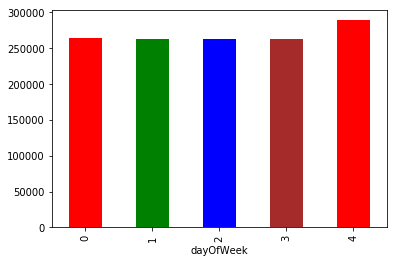

In [125]:
# Creating a Bar chart for Blue Cars taken based on weekday daytype
import matplotlib.pyplot as plt

colors = ["red","green","blue","brown"]
weekend.groupby('dayOfWeek')["BlueCars_taken_sum"].sum().plot.bar(colors=colors)
plt.show()

## **Histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f072a6247f0>,
      dtype=object)

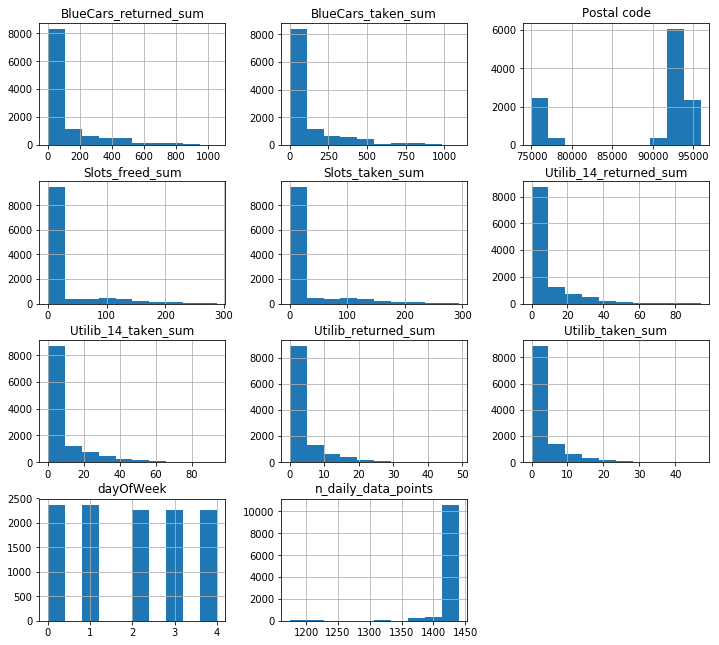

In [127]:

weekend.hist(figsize=(12,11))

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


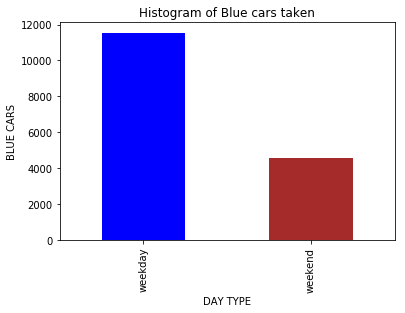

In [131]:
# A comparison between the blue cars on weekdays vs weekend
data.groupby('day_type')["day_type"].count().plot(kind="bar",colors=colors)
colors = ["blue","blue"]
plt.xlabel('DAY TYPE')
plt.ylabel('BLUE CARS')
plt.title('Histogram of Blue cars taken') 
plt.show()

## **Pie Chart**

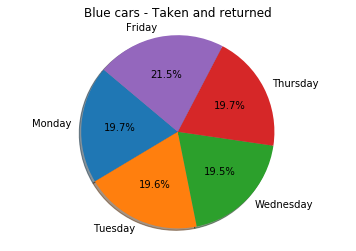

In [64]:
# Creating a Pie chart for the weekdays columns Blue cars taken and blu cars returned
# Assigning our columns to Blue cars Returned and Blue cars taken
# taken = weekend['BlueCars_taken_sum']
# returned = data_sample['BlueCars_taken_sumgroup = 
label = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
week = weekend.groupby("dayOfWeek").BlueCars_taken_sum.sum()
week
# Plotting our pie chart
# -------
plt.pie(week, labels = label, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Blue cars - Taken and returned')
plt.show()

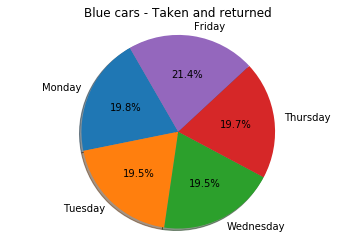

In [66]:
# Pie Chart for the Blue cars Returned
label = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
week = weekend.groupby("dayOfWeek").BlueCars_returned_sum.sum()
week
# Plotting our pie chart
# -------
plt.pie(week, labels = label, autopct = '%1.1f%%', shadow = True, startangle = 120)
plt.axis('equal')
plt.title('Blue cars - Taken and returned')
plt.show()

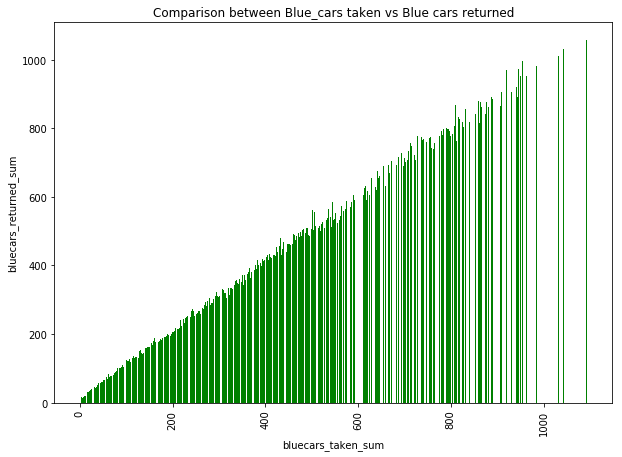

In [132]:
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(weekend.BlueCars_taken_sum, weekend.BlueCars_returned_sum, color='green')
plt.xticks(rotation=90)
ax.set_xlabel('bluecars_taken_sum')
ax.set_ylabel('bluecars_returned_sum')
plt.title('Comparison between Blue_cars taken vs Blue cars returned')
plt.show()
 


In [0]:
# Showing pie Chart
# Weekend vs weekdays

day = weekend.groupby("day_type").BlueCars_returned_sum.sum()
label = ['weekday','weekend']
explode=[0,0.1,]
# colors=["red","orange"]

plt.pie(x = day, explode=explode, labels=label,autopct ='%1.1f%%',shadow = True, startangle = 90)
plt.axis('equal')
plt.title('ride sharing company')
plt.show()



# df=weekend.groupby('day_type').BlueCars_taken_sum.sum()
# explode=[0,0.1,]
# label=['weekday','weekend']
# plt.pie(df, explode=explode, labels=label ,autopct = '%1.1f%%', shadow = True, startangle = 90)
# plt.axis('equal')
# plt.title('Pie chart of day_type and  how the bluecars were taken from the stations ')
# plt.show() 

# **Bivariate Analysis**

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of 


relationship between two variables, whether there exists an association and the strength of this association

### *Pearson Coefficient*

In [5]:
# Calculating the pearson coefficient
pearson_coeff = data["BlueCars_taken_sum"].corr(data["BlueCars_returned_sum"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = data["BlueCars_taken_sum"].corr(data["BlueCars_returned_sum"]) 
print(coeff)

0.9986597051672199
0.9986597051672199


In [149]:
# Finding the correlation between the blucars columns

weekend["BlueCars_taken_sum"].corr(weekend["BlueCars_returned_sum"])

0.9987802776217566

### **Scatter Plot**

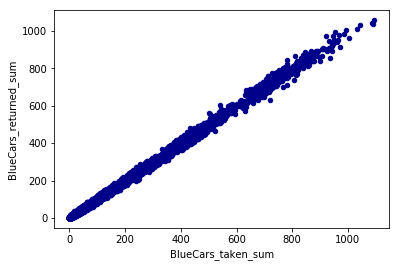

In [158]:
columms = ["BlueCars_taken_sum","BlueCars_returned_sum"]
weekend.plot.scatter(x='BlueCars_taken_sum',y='BlueCars_returned_sum',c='DarkBlue')


In [159]:
# Looking for the correlation between the Blue cars and the free slots
# Slots_freed_sum
weekend["BlueCars_taken_sum"].corr(weekend["Slots_freed_sum"])

0.9456996758586342

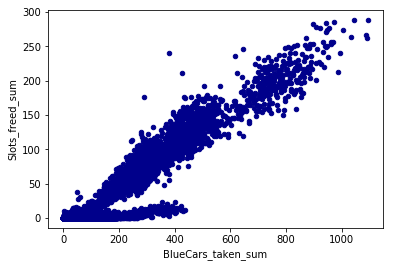

In [160]:
# Scatter plot between the blue cars and slots
columms = ["BlueCars_taken_sum","Slots_freed_sum"]
weekend.plot.scatter(x='BlueCars_taken_sum',y='Slots_freed_sum',c='DarkBlue')

### **Line Graphs**

A line chart or line graph is a type of chart which displays 


information as a series of data points called ‘markers’ connected by straight line segments.

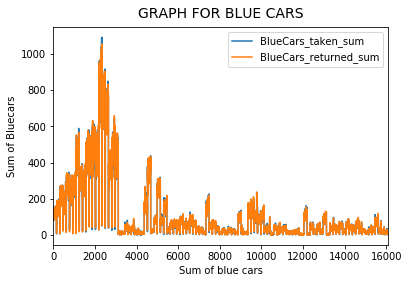

In [162]:
weekend[["BlueCars_taken_sum","BlueCars_returned_sum"]].plot()

# Giving a title to our line graph
plt.title("GRAPH FOR BLUE CARS", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Sum of Bluecars')

# Labelling the x-axis
plt.xlabel('Sum of blue cars')

# Displaying our graph
plt.show()

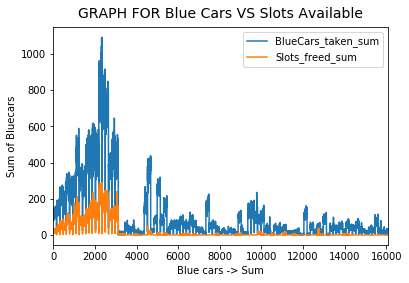

In [165]:
# Line graph for Blue cars and slots available
weekend[["BlueCars_taken_sum","Slots_freed_sum"]].plot()

# Giving a title to our line graph
plt.title("GRAPH FOR Blue Cars VS Slots Available", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Sum of Bluecars')

# Labelling the x-axis
plt.xlabel('Blue cars -> Sum')

# Displaying our graph
plt.show()

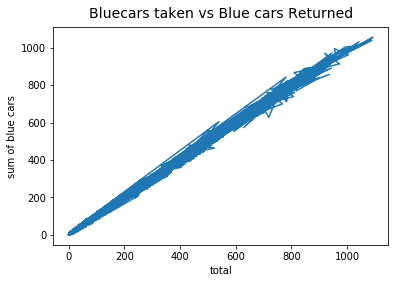

In [188]:
# Line Plot for Blue cars returned
# OUR CODE GOES HERE
# Plotting our line graph

week = weekend["BlueCars_taken_sum"]

week2 = weekend["BlueCars_returned_sum"]
# colors = ["green","brown"]
plt.plot(week,week2)

# Giving a title to our line graph
plt.title("Bluecars taken vs Blue cars Returned", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('sum of blue cars')

# Labelling the x-axis
plt.xlabel('total')

# Displaying our graph
plt.show()

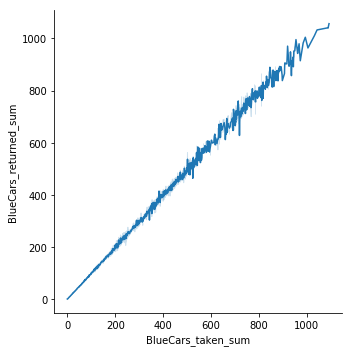

In [174]:
# BlueCars_taken_sum
columns = ["BlueCars_taken_sum","BlueCars_returned_sum"]
sns.relplot(x="BlueCars_taken_sum", y="BlueCars_returned_sum", kind="line", data=weekend)

# **Heat Map**

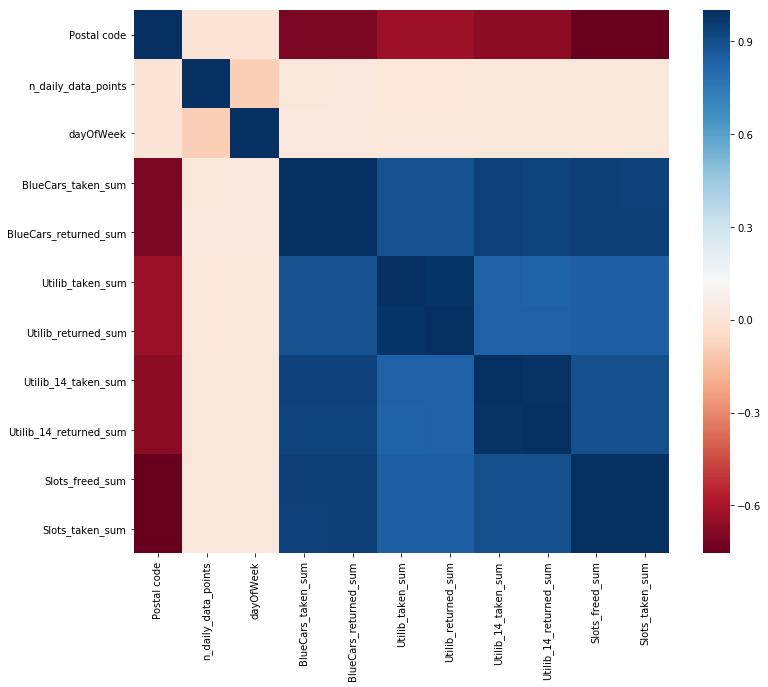

In [184]:
# Creating a heat map for the column

weekend_blue = weekend["BlueCars_returned_sum"]
plt.figure(figsize=(12, 10))
sns.heatmap(weekend.corr(), cmap="RdBu")

# **Multivariate Analysis**

This is performed to understand interactions between 


different fields in the dataset (or) finding interactions between variables more than 2.

In [190]:
# Creating a pairplot But 
# i have to identify numeric values
data.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

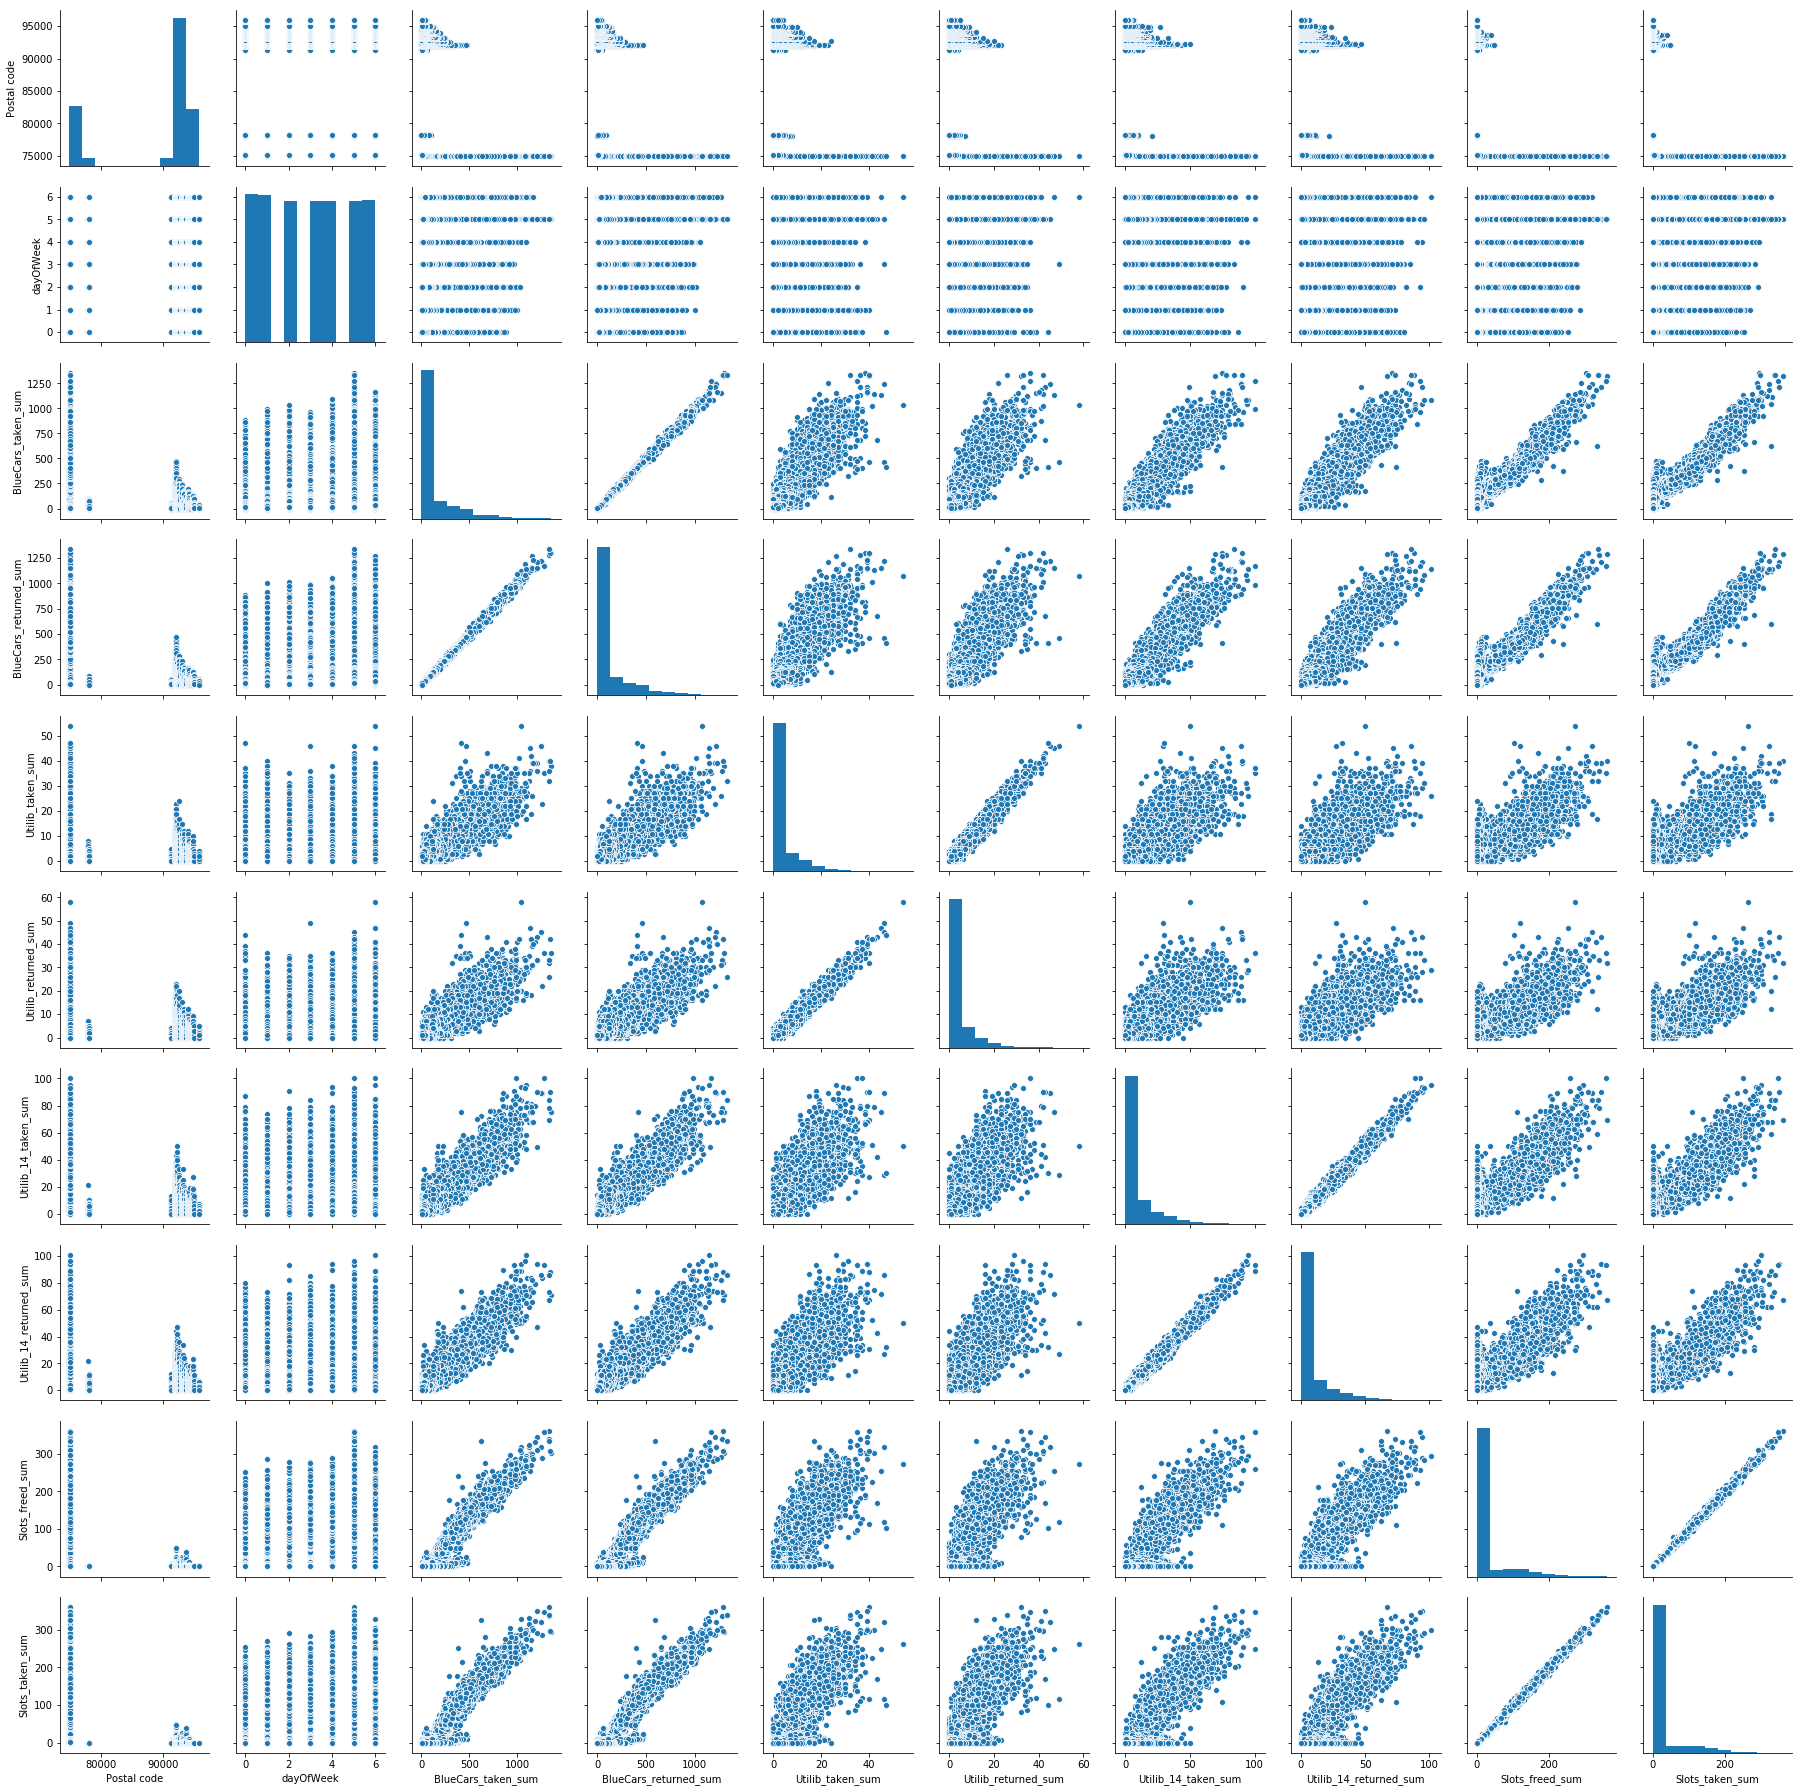

In [8]:
# Creating a pairplot
Data = data[["Postal code","dayOfWeek","BlueCars_taken_sum","BlueCars_returned_sum","Utilib_taken_sum","Utilib_returned_sum",
           "Utilib_14_taken_sum","Utilib_14_returned_sum","Slots_freed_sum","Slots_taken_sum"]]
sns.pairplot(Data)

In [24]:
# Describing the Numeric values
Data.describe()

,Postal code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


### Creating a pair plot for Postal adress and blue cars column

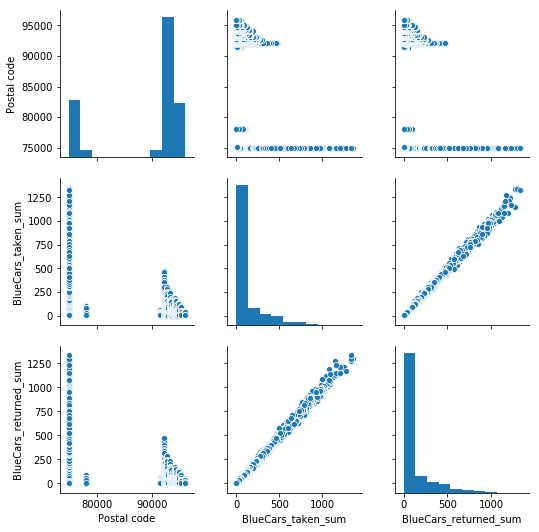

In [9]:
# Creating a pair plot for postal address and Blue cars column
pair = data[["Postal code","BlueCars_taken_sum","BlueCars_returned_sum"]]

sns.pairplot(pair)

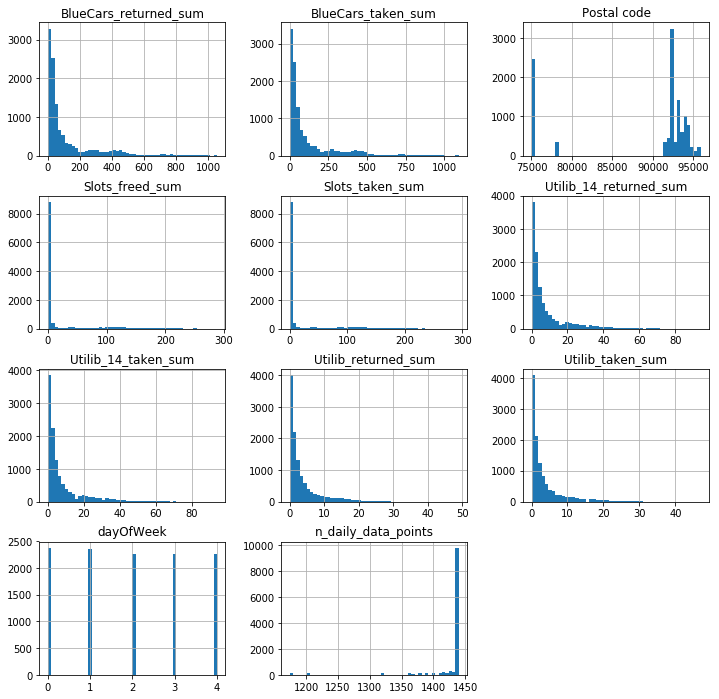

In [189]:
# Checking the relationship of columns using histogram illustrations
weekend.hist(bins=50, figsize=(12,12));


In [0]:
from matplotlib.pyplot import *

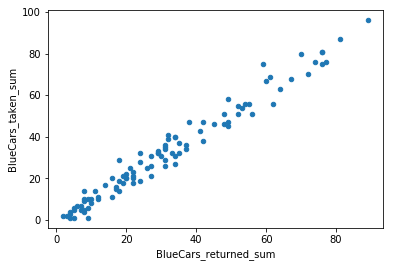

In [30]:
# Creating a scatter plot
columns = ["BlueCars_returned_sum","BlueCars_taken_sum"]
data[data['BlueCars_returned_sum'] < 100].sample(100).plot.scatter(x='BlueCars_returned_sum', y='BlueCars_taken_sum')


In [0]:
from matplotlib import pyplot as plt



### *Correlation Matrix for the dataFrame*

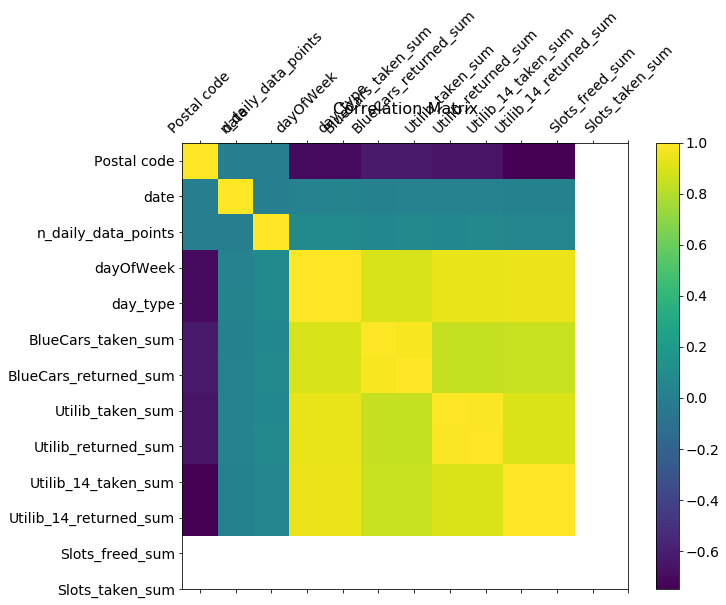

In [36]:
# Creating a correlation matrix for the dataframe
%matplotlib inline

f = plt.figure(figsize=(10,8))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [39]:
data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


### *Linear Regression*

In [0]:
# Splitting the dataset into X and y
col = data.drop(['date', 'Postal code'], axis =1)
post_conv = data['Postal code'].astype('int')

# Encoding categorical columns; day of week and day_type
X1 =pd.get_dummies(col)

# Standardising 
sc = StandardScaler()
X = sc.fit_transform(X1)



## **Calculating z - TEST**

## ** formula  =  Z = (x – μ) / (σ / √n)**

In [0]:
# MY Null Hypothesis is that the sum of total number of blue cars are NOT the same in most days of the week.
# My alternative is that the sum of total number of blue cars are the same in most days of the week.

# formula Z = (x – μ) / (σ / √n)

# x=mean

# μ= sample mean

# σ=standard deviation

# √n= represents the square root of the numberof the samples


In [56]:
# First i will check the mean of the 1000 - whcih is the sample of my data frame

data = weekend["BlueCars_taken_sum"].mean()

print("The mean for blue cars taken is", data)

The mean for blue cars taken is 116.0286729036729


In [57]:
# Then will find the standard deviation std()

datas = weekend["BlueCars_taken_sum"].std()

print("The standard deviation for blue cars taken is", datas)

The standard deviation for blue cars taken is 169.62690469970084


In [61]:
weekend.mean()

Postal code               88789.959286
n_daily_data_points        1430.007277
dayOfWeek                     1.973926
BlueCars_taken_sum          116.028673
BlueCars_returned_sum       115.639380
Utilib_taken_sum              3.424983
Utilib_returned_sum           3.417620
Utilib_14_taken_sum           7.999047
Utilib_14_returned_sum        7.975485
Slots_freed_sum              20.945166
Slots_taken_sum              20.921431
dtype: float64

In [64]:
weekend.size

13000

In [0]:
weekend = weekend.sample(n=1000)
print(weekend)


In [66]:
# calculating the Z value
# i chose z score since my sample is more that 30

signal=(116-data) # x - u
#√1000=31.62277660
noise=(datas/31.622) # std / sample(1000)
z_score=(signal/noise)
print('Z score is ',z_score)


Z score is  -0.005345228468028496


### ***z score stands at -0.005345228468028496***

### ***Noted that since the z score results in a negative, this means its a LEFT TAIL***

## **P - Value**

In [68]:
# Assuming my significance level stands at 0.06
# will subtract 1 from my z_score
# stats and Norm imported

Pvalue = 1 - stats.norm.cdf(z_score)
Pvalue

0.5021324274798667

In [0]:
# 0.5021324274798667 means its less than the significance level(0.06) thus i will regect my null hypothesis.

## ***0.5021324274798667 means its less than the significance level(0.06) thus i will regect my null hypothesis.***

# **DOCUMENTATION**